In [71]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from arch import arch_model

In [29]:
vietnam_cpi = pd.read_csv('../data/raw/vietnam_cpi.csv', parse_dates=['Ngày Phát Hành'])

In [30]:
vietnam_cpi

,Ngày Phát Hành,Thời gian,Thực tế,Dự báo,Trước đó
0,2025-10-06,02:00,3.38%,NaN,3.24%
1,2025-09-06,02:00,3.24%,NaN,3.19%
2,2025-08-06,02:00,3.19%,NaN,3.57%
3,2025-07-05,04:30,3.57%,NaN,3.24%
4,2025-06-06,02:00,3.24%,NaN,3.12%
...,...,...,...,...,...
77,2019-04-29,02:00,2.90%,NaN,2.70%
78,2019-03-29,02:30,2.70%,NaN,2.64%
79,2019-02-28,03:30,2.64%,NaN,2.56%
80,2019-01-29,03:00,2.56%,NaN,2.98%


In [31]:
vietnam_cpi['Thực tế'] = vietnam_cpi['Thực tế'].str.replace('%', '').astype(float)
vietnam_cpi['Ngày Phát Hành'] = pd.to_datetime(vietnam_cpi['Ngày Phát Hành'], dayfirst=True, errors='coerce')

In [32]:
vietnam_cpi

,Ngày Phát Hành,Thời gian,Thực tế,Dự báo,Trước đó
0,2025-10-06,02:00,3.38,NaN,3.24%
1,2025-09-06,02:00,3.24,NaN,3.19%
2,2025-08-06,02:00,3.19,NaN,3.57%
3,2025-07-05,04:30,3.57,NaN,3.24%
4,2025-06-06,02:00,3.24,NaN,3.12%
...,...,...,...,...,...
77,2019-04-29,02:00,2.90,NaN,2.70%
78,2019-03-29,02:30,2.70,NaN,2.64%
79,2019-02-28,03:30,2.64,NaN,2.56%
80,2019-01-29,03:00,2.56,NaN,2.98%


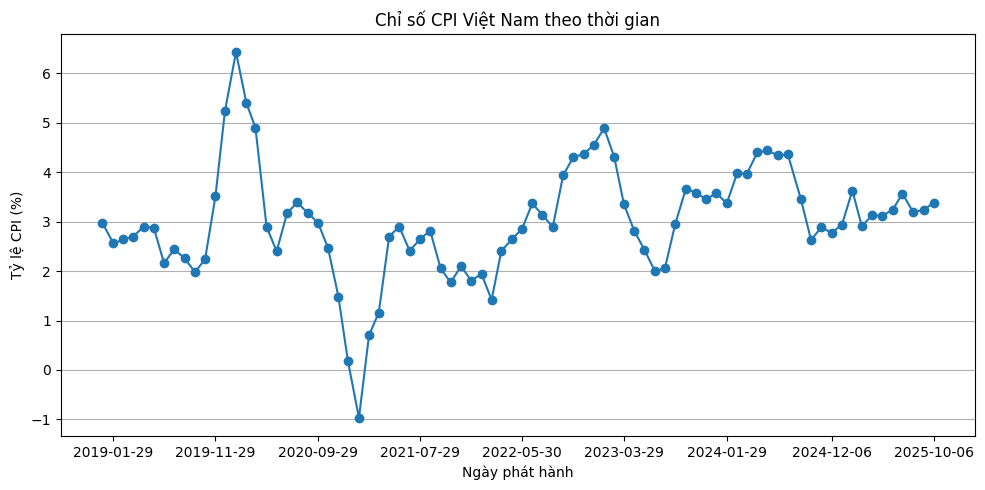

In [33]:
plt.figure(figsize=(10, 5))
plt.plot(vietnam_cpi['Ngày Phát Hành'], vietnam_cpi['Thực tế'], marker='o')
plt.title('Chỉ số CPI Việt Nam theo thời gian')
plt.xlabel('Ngày phát hành')
plt.ylabel('Tỷ lệ CPI (%)')
plt.xticks(rotation=45)
plt.xticks(vietnam_cpi['Ngày Phát Hành'][::10], rotation=0)
plt.grid(axis=('y'))
plt.tight_layout()
plt.show()

In [34]:
fed_interest_rate = pd.read_excel('../data/raw/Search.xlsx', parse_dates=['Effective Date'])

c:\Users\VICTUS\Documents\developer\UIT_year3_sem1\stock-price-analysis\venv\lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [35]:
fed_interest_rate

,Effective Date,Rate Type,Rate (%),1st Percentile (%),25th Percentile (%),75th Percentile (%),99th Percentile (%),Volume ($Billions),Target Rate From (%),Target Rate To (%),Intra Day - Low (%),Intra Day - High (%),Standard Deviation (%),30-Day Average SOFR,90-Day Average SOFR,180-Day Average SOFR,SOFR Index,Revision Indicator (Y/N),Footnote ID
0,2025-10-14,EFFR,4.10,4.08,4.10,4.11,4.18,80.0,4.0,4.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2025-10-10,EFFR,4.10,4.08,4.09,4.10,4.15,87.0,4.0,4.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2025-10-09,EFFR,4.10,4.08,4.09,4.10,4.15,84.0,4.0,4.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2025-10-08,EFFR,4.10,4.08,4.09,4.10,4.15,76.0,4.0,4.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2025-10-07,EFFR,4.09,4.08,4.09,4.10,4.15,81.0,4.0,4.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6349,2000-07-10,EFFR,6.51,NaN,NaN,NaN,NaN,NaN,6.5,NaN,6.25,6.63,0.03,NaN,NaN,NaN,NaN,r,NaN
6350,2000-07-07,EFFR,6.42,NaN,NaN,NaN,NaN,NaN,6.5,NaN,6.00,6.75,0.12,NaN,NaN,NaN,NaN,NaN,NaN
6351,2000-07-06,EFFR,6.51,NaN,NaN,NaN,NaN,NaN,6.5,NaN,6.25,8.00,0.13,NaN,NaN,NaN,NaN,NaN,NaN
6352,2000-07-05,EFFR,6.52,NaN,NaN,NaN,NaN,NaN,6.5,NaN,2.00,6.94,0.50,NaN,NaN,NaN,NaN,NaN,NaN


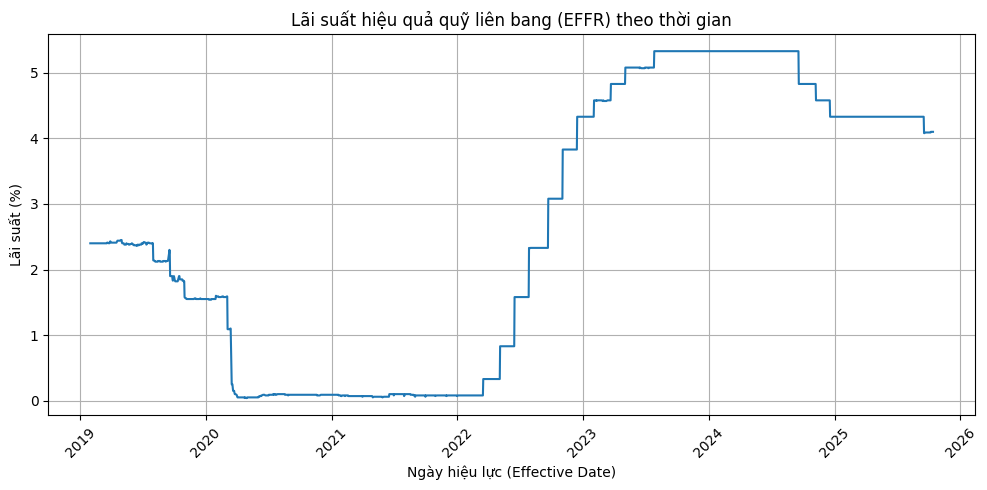

In [40]:
plt.figure(figsize=(10, 5))
plt.plot(
    fed_interest_rate[fed_interest_rate['Effective Date'] > '2019-01-29']['Effective Date'],
    fed_interest_rate[fed_interest_rate['Effective Date'] > '2019-01-29']['Rate (%)']
)
plt.title('Lãi suất hiệu quả quỹ liên bang (EFFR) theo thời gian')
plt.xlabel('Ngày hiệu lực (Effective Date)')
plt.ylabel('Lãi suất (%)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
fed_interest_rate[fed_interest_rate['Effective Date'] > '2019-01-29']['Effective Date'],
fed_interest_rate[fed_interest_rate['Effective Date'] > '2019-01-29']['Rate (%)']

vietnam_cpi['Ngày Phát Hành'], vietnam_cpi['Thực tế']

0       4.10
1       4.10
2       4.10
3       4.10
4       4.09
        ... 
1680    2.40
1681    2.40
1682    2.40
1683    2.40
1684    2.40
Name: Rate (%), Length: 1685, dtype: float64

In [43]:
fed_interest_rate['Effective Date'] = pd.to_datetime(fed_interest_rate['Effective Date'])
vietnam_cpi['Ngày Phát Hành'] = pd.to_datetime(vietnam_cpi['Ngày Phát Hành'])

In [44]:
fed_monthly = fed_interest_rate.resample('M', on='Effective Date').mean(numeric_only=True)

C:\Users\VICTUS\AppData\Local\Temp\ipykernel_31188\2060042400.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  fed_monthly = fed_interest_rate.resample('M', on='Effective Date').mean(numeric_only=True)


In [45]:
merged = pd.merge(
    fed_monthly,
    vietnam_cpi,
    left_on=fed_monthly.index.month,
    right_on=vietnam_cpi['Ngày Phát Hành'].dt.month,
    how='inner'
)

In [46]:
correlation = merged['Thực tế'].corr(merged['Rate (%)'])
print("Hệ số tương quan CPI vs Lãi suất FED:", correlation)

Hệ số tương quan CPI vs Lãi suất FED: -0.0009851673462501578


In [52]:
fpt_historical_stock_price = pd.read_csv(r'..\data\raw\fpt_historical_price.csv', parse_dates=['time'])
fpt_historical_stock_price

,time,open,high,low,close,volume
0,2007-01-02,11.09,11.09,10.85,10.85,81170
1,2007-01-03,10.85,11.09,10.85,11.09,74660
2,2007-01-04,11.64,11.64,11.64,11.64,148510
3,2007-01-05,12.20,12.20,12.20,12.20,377800
4,2007-01-08,12.57,12.57,12.08,12.08,351470
...,...,...,...,...,...,...
4673,2025-10-03,92.20,94.00,92.10,93.40,7681300
4674,2025-10-06,94.30,95.90,93.50,95.50,6580000
4675,2025-10-07,96.00,96.30,95.20,95.50,5997500
4676,2025-10-08,95.50,96.90,94.50,94.50,5132100


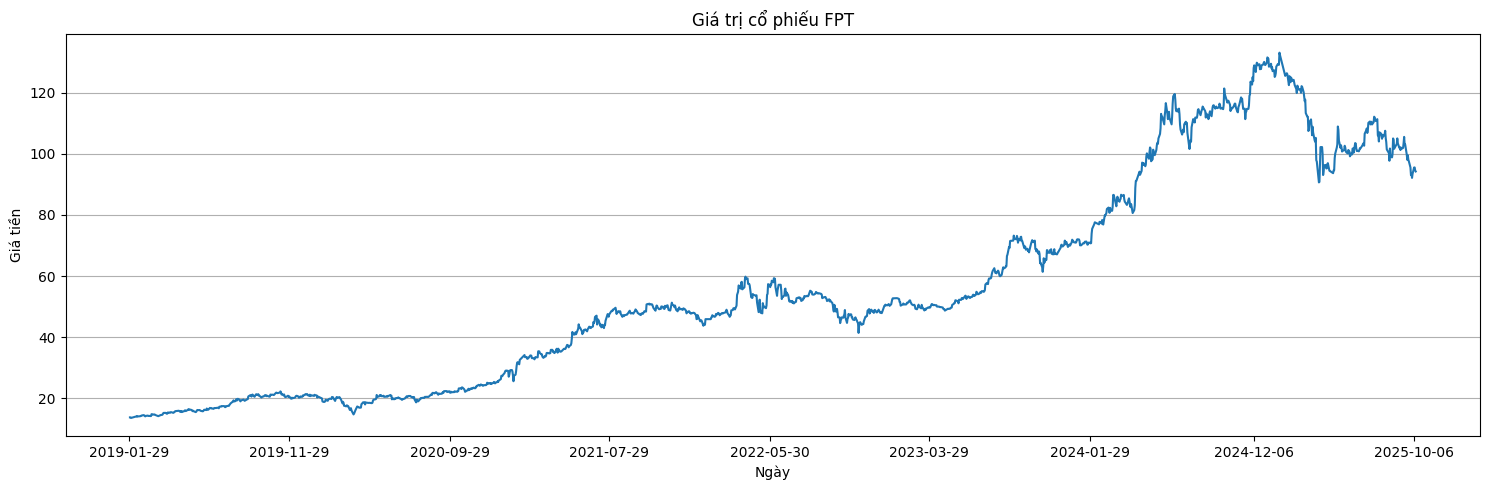

In [59]:
plt.figure(figsize=(15, 5))
plt.plot(
    fpt_historical_stock_price[fpt_historical_stock_price['time'] > '2019-01-29']['time'],
    fpt_historical_stock_price[fpt_historical_stock_price['time'] > '2019-01-29']['close']
)
plt.title('Giá trị cổ phiếu FPT')
plt.xlabel('Ngày')
plt.ylabel('Giá tiền')
plt.xticks(rotation=45)
plt.xticks(vietnam_cpi['Ngày Phát Hành'][::10], rotation=0)
plt.grid(axis=('y'))
plt.tight_layout()
plt.show()

In [77]:
best_aic = float('inf')
best_order = None

for p in range(1,4):      # thử p từ 1 tới 3
    for q in range(1,4):  # thử q từ 1 tới 3
        model = arch_model(returns, vol='Garch', p=p, q=q)
        res = model.fit(disp='off')
        if res.aic < best_aic:
            best_aic = res.aic
            best_order = (p,q)

print("Best GARCH(p,q) by AIC:", best_order)

c:\Users\VICTUS\Documents\developer\UIT_year3_sem1\stock-price-analysis\venv\lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002956. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\VICTUS\Documents\developer\UIT_year3_sem1\stock-price-analysis\venv\lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002956. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting resca

Best GARCH(p,q) by AIC: (3, 3)


                     Constant Mean - GARCH Model Results                      
Dep. Variable:                 return   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                1925.84
Distribution:                  Normal   AIC:                          -3843.68
Method:            Maximum Likelihood   BIC:                          -3825.55
                                        No. Observations:                  688
Date:                Thu, Oct 16 2025   Df Residuals:                      687
Time:                        14:26:20   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         1.2134e-03  7.268e-06    166.951      0.000 [1.

c:\Users\VICTUS\Documents\developer\UIT_year3_sem1\stock-price-analysis\venv\lib\site-packages\arch\univariate\base.py:309: DataScaleWarning:

y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002449. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.




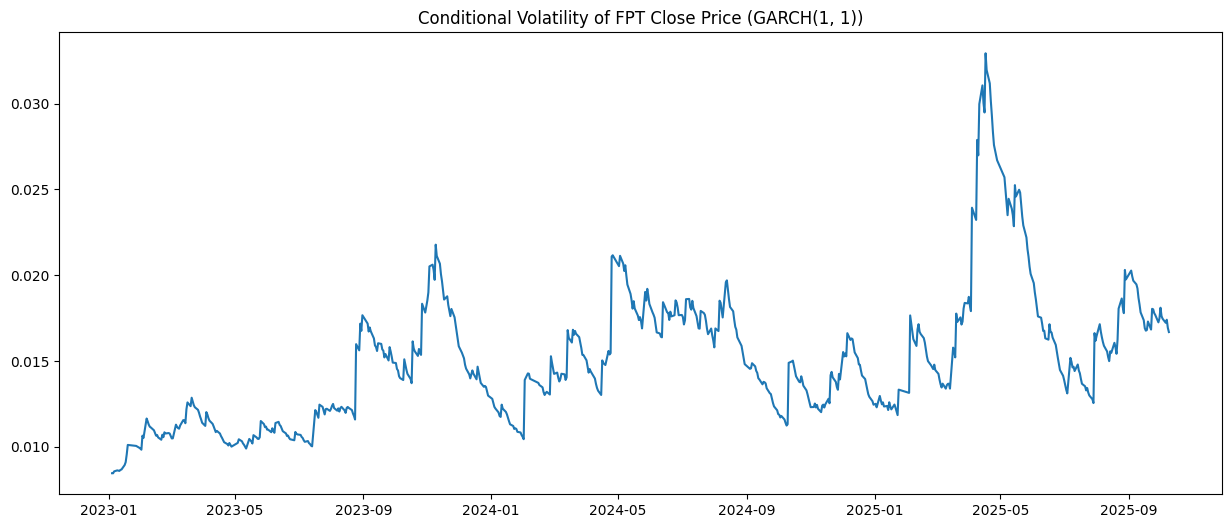

In [105]:
fpt_filtered = fpt_historical_stock_price[fpt_historical_stock_price['time'] > '2023-01-01']
fpt_filtered = fpt_filtered.sort_values('time')

# Tính log return
fpt_filtered['return'] = (fpt_filtered['close'].pct_change()).apply(lambda x: np.log(1+x))
returns = fpt_filtered['return'].dropna()

P, Q = (1, 1)
# Fit GARCH(1,1)
model = arch_model(returns, vol='Garch', p=P, q=Q)
res = model.fit(disp='off')

print(res.summary())

# Dự báo phương sai có điều kiện
fitted_vol = res.conditional_volatility

# Vẽ
import matplotlib.pyplot as plt
plt.figure(figsize=(15,6))
plt.plot(fpt_filtered['time'][1:], fitted_vol)
plt.title(f'Conditional Volatility of FPT Close Price (GARCH({P}, {Q}))')
plt.show()

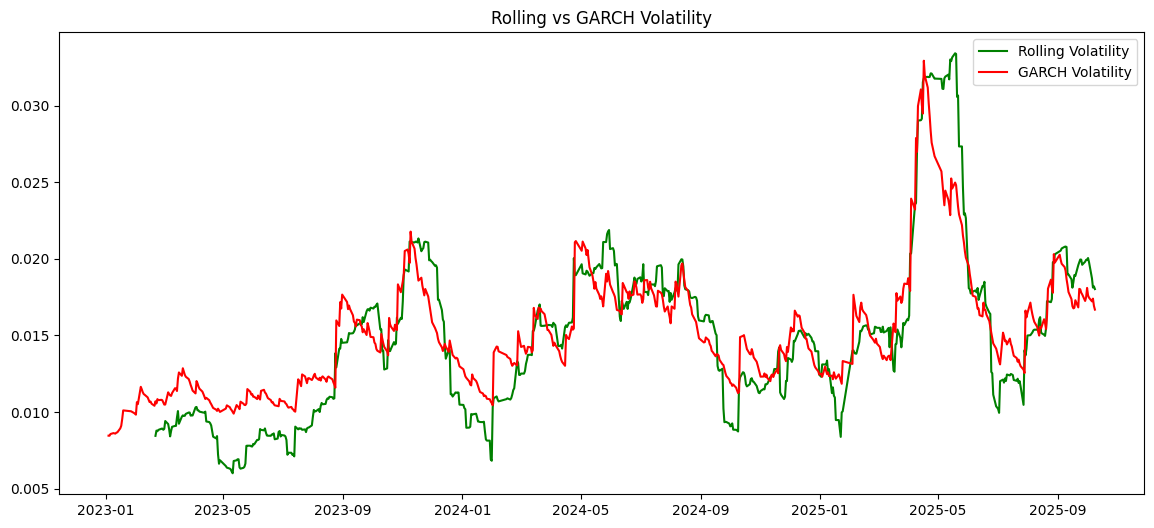

In [106]:
rolling_var = fpt_filtered['return'].rolling(window=30).std()

plt.figure(figsize=(14,6))
plt.plot(fpt_filtered['time'][1:], rolling_var[1:], label='Rolling Volatility', color='green')
plt.plot(fpt_filtered['time'][1:], fitted_vol, label='GARCH Volatility', color='red')
plt.legend()
plt.title('Rolling vs GARCH Volatility')
plt.show()


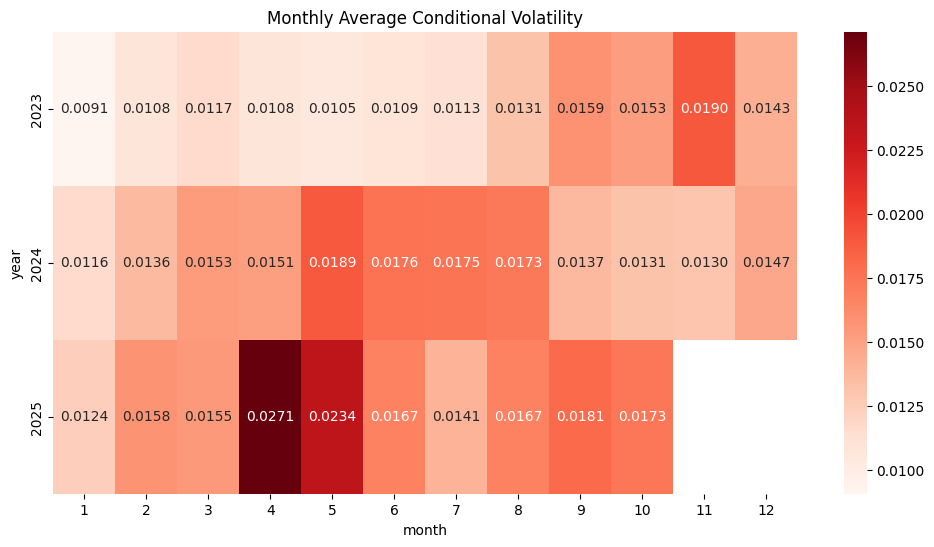

In [87]:
import seaborn as sns

fpt_filtered['month'] = fpt_filtered['time'].dt.month
fpt_filtered['year'] = fpt_filtered['time'].dt.year
fpt_filtered['conditional_vol'] = fitted_vol

monthly_vol = fpt_filtered.groupby(['year','month'])['conditional_vol'].mean().unstack()
plt.figure(figsize=(12,6))
sns.heatmap(monthly_vol, cmap='Reds', annot=True, fmt=".4f")
plt.title('Monthly Average Conditional Volatility')
plt.show()
